### Import package

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os
from sklearn.feature_selection import SelectKBest,chi2
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from skmultilearn.problem_transform import BinaryRelevance,ClassifierChain, LabelPowerset
from skmultilearn.adapt import MLkNN
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
from skmultilearn.ensemble import LabelSpacePartitioningClassifier
from skmultilearn.cluster.networkx import NetworkXLabelGraphClusterer
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MultiLabelBinarizer
import nltk
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import LancasterStemmer
from skmultilearn.ensemble import MajorityVotingClassifier
from skmultilearn.cluster import FixedLabelSpaceClusterer
from skmultilearn.adapt import BRkNNaClassifier,BRkNNbClassifier
from sklearn.multioutput import RegressorChain
from mlxtend.classifier import StackingClassifier
import joblib
import ipyparallel as ipp

### Import dataset

In [2]:
pd.set_option('max_columns', None)
data_train=pd.read_csv('train.csv')
data_train

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  abuse  loathe  
0               0                 0     0       0      0       0  
1               0                 0     0       0      0       0  
2               0                 0     0       0      0       0  
3               0                 0     0       0      0       0  
4               0                 0     0       0      0       0  
...           ...               ...   ...     ...    ...     ...  
159566          0                 0     0       0      0       0  
159567          0                 0     0       0      0       0  
159568          0                 0     0       0      0       0  
159569          0                 0     0       0      0       0  
159570          0                 0     0       0      0       0  

[159571 rows x 8 columns]

In [3]:
data_test=pd.read_csv('test.csv')
data_test

id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]

### Data Pre-processing

In [4]:
data_train=data_train.drop(['id'],axis=1)
data_test=data_test.drop(['id'],axis=1)

In [5]:
def preprocess_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))  
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"\d+", "", elem))
    df[text_field] = df[text_field].apply(lambda elem: ' '.join([wnl.lemmatize(word) for word in elem.split()]))
    df[text_field] = df[text_field].apply(lambda elem: ' '.join([word for word in set(elem.split()) if len(word)>2 if word not in (stop)]))
    return df

In [6]:
wnl = nltk.WordNetLemmatizer()
stop = stopwords.words('english')
train=preprocess_text(data_train,'comment_text')
test=preprocess_text(data_test,'comment_text')
train

comment_text  malignant  \
0       closure edits explanation since remove talk fa...          0   
1       utc aww seemingly match stuck colour thanks ba...          0   
2       guy edits relevant actual trying hey talking i...          0   
3       preference exact need real reviewer section fo...          0   
4                           remember page hero chance sir          0   
...                                                   ...        ...   
159566  source aspect one asking opening anyone contra...          0   
159567               page thing talk ashamed horrible put          0   
159568  prostitution article crunch spitzer umm ring a...          0   
159569  version deleted put look first like speedy act...          0   
159570  helping kind rewrite think understand really i...          0   

        highly_malignant  rude  threat  abuse  loathe  
0                      0     0       0      0       0  
1                      0     0       0      0       0  
2                      0     0       0      0       0  
3                      0     0       0      0       0  
4                      0     0       0      0       0  
...                  ...   ...     ...    ...     ...  
159566                 0     0       0      0       0  
159567                 0     0       0      0       0  
159568                 0     0       0      0       0  
159569                 0     0       0      0       0  
159570                 0     0       0      0       0  

[159571 rows x 7 columns]

### EDA

In [7]:
print('Train Dataset contains '+str(train.shape[0])+' rows & '+str(train.shape[1])+' columns')
print('Test Dataset contains '+str(test.shape[0])+' rows & '+str(test.shape[1])+' columns')

Train Dataset contains 159571 rows & 7 columns
Test Dataset contains 153164 rows & 1 columns


<AxesSubplot:xlabel='comment_text'>

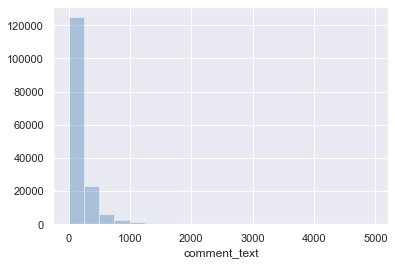

In [8]:
sn.set(color_codes=True)
comment_len = train.comment_text.str.len()
sn.distplot(comment_len, kde=False, bins=20, color="steelblue")

##### Plot a bar chart using the categorical values and the frequency of each category.

<AxesSubplot:title={'center':'Labels Frequency'}>

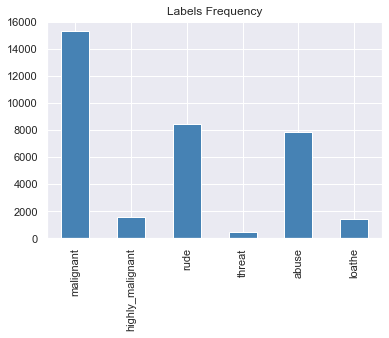

In [9]:
train_labels = train[['malignant', 'highly_malignant', 'rude','threat', 'abuse', 'loathe']]
label_count = train_labels.sum()
label_count.plot(kind='bar', title='Labels Frequency', color='steelblue')

### Visualizing most frequent words w.r.t each labels

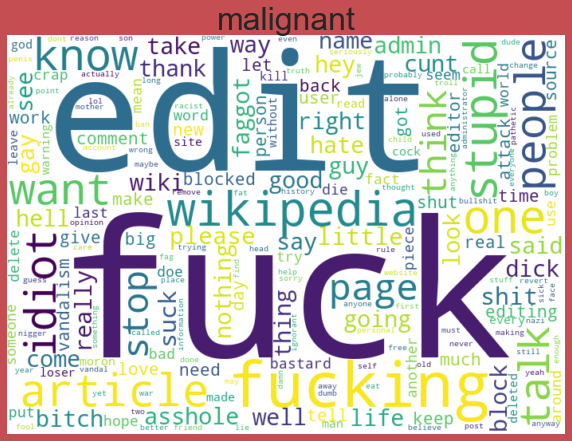

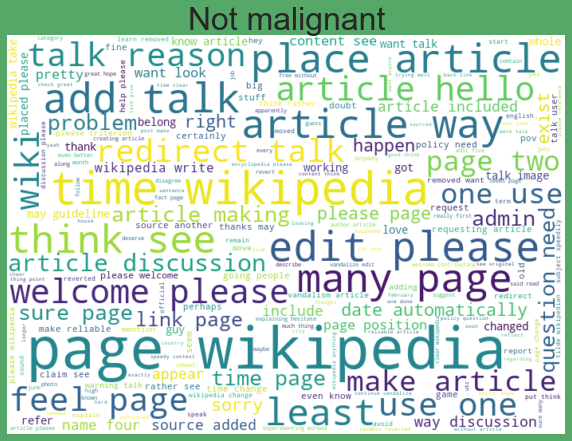

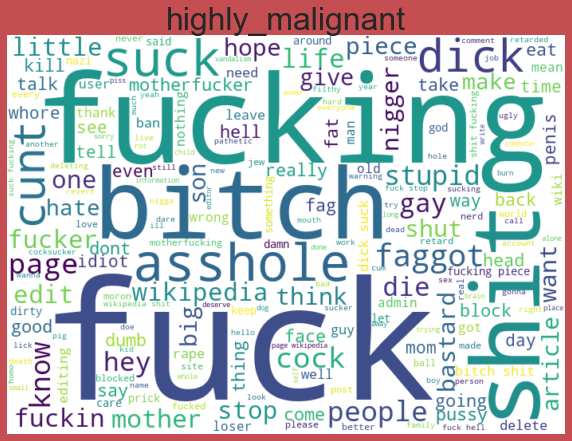

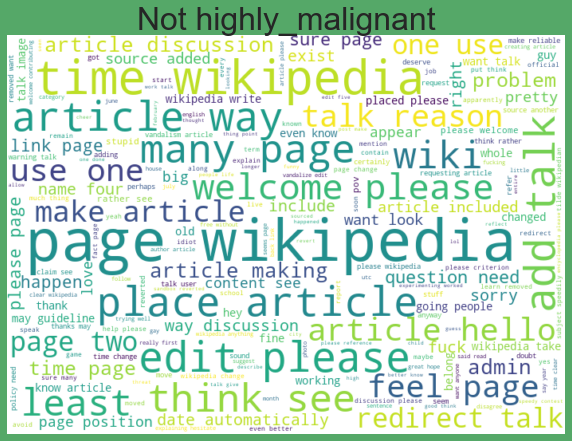

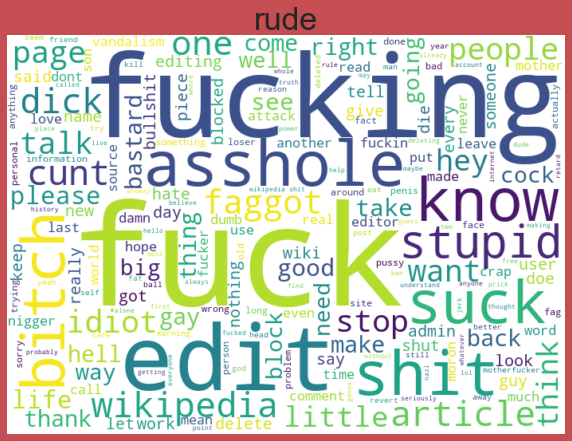

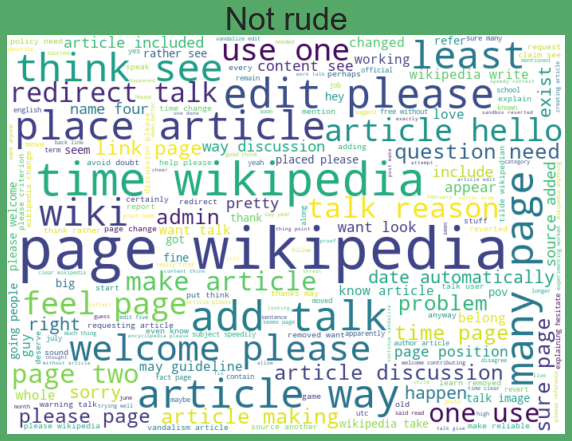

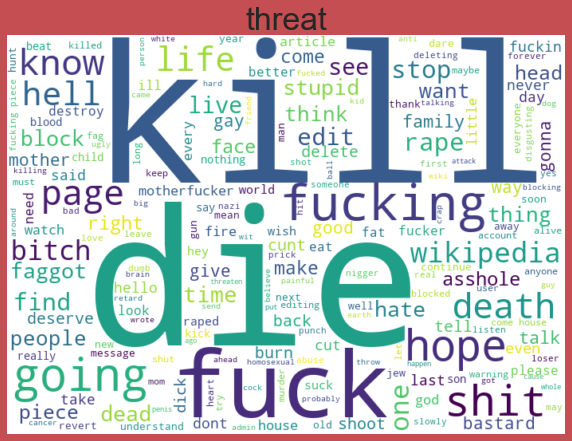

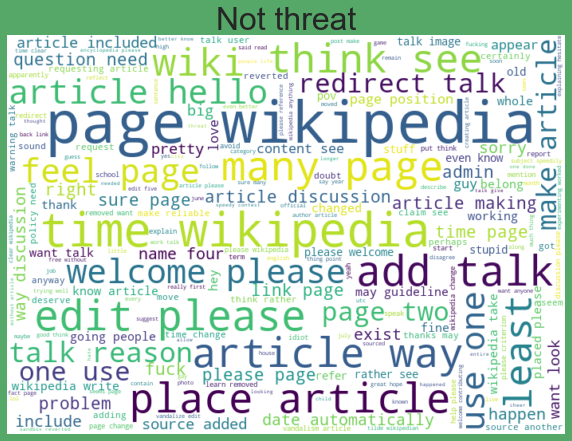

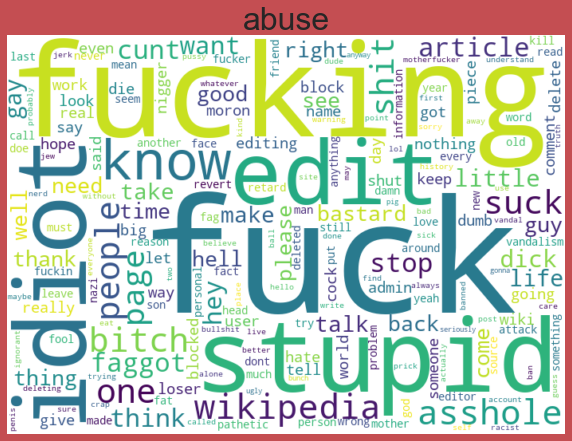

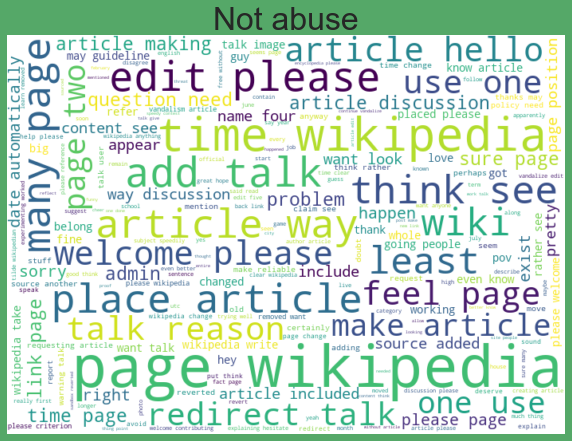

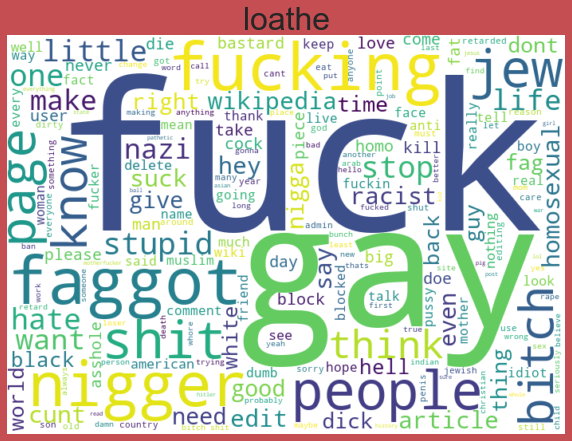

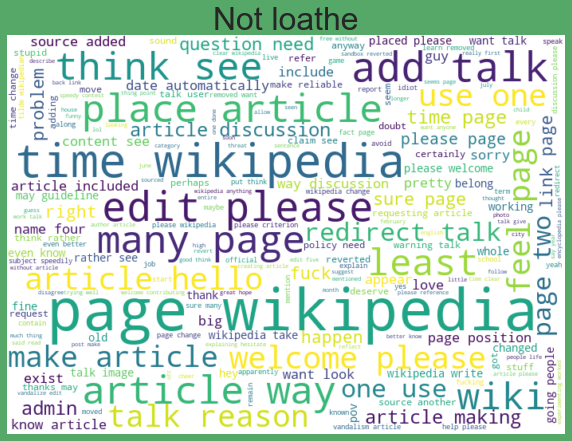

In [10]:
listy=list(train.columns)
listy.remove('comment_text')
for i in listy:
        plt.figure(figsize = (10,8),facecolor='r')
        dat=train['comment_text'][train[i]==1]
        wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat))
        plt.imshow(wordC, interpolation='bilinear')
        plt.title(i, fontsize = 32)
        plt.axis("off")
        plt.show()
        
        dat=train['comment_text'][train[i]==0]
        wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat))
        plt.figure(figsize = (10,8),facecolor='g')
        plt.imshow(wordC, interpolation='bilinear')
        plt.axis("off")
        plt.title('Not '+i, fontsize = 32)
        plt.show()

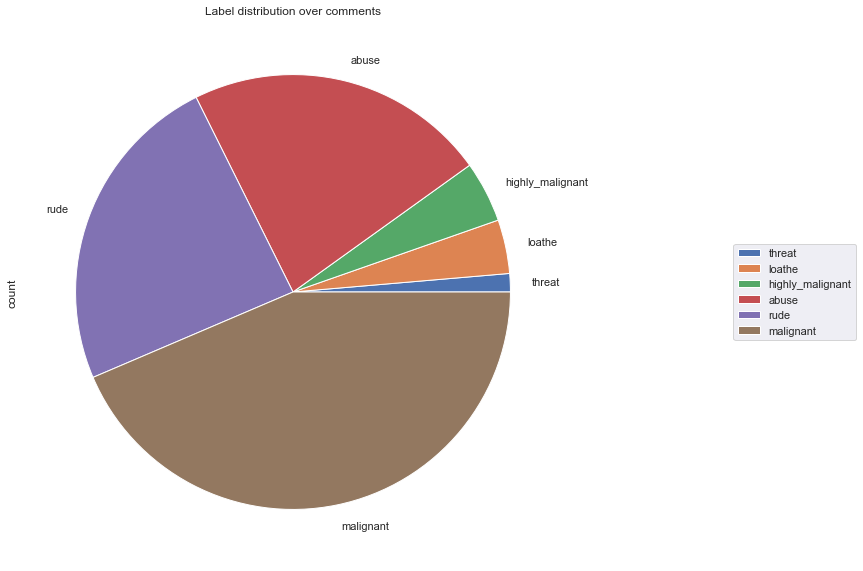

In [11]:
df_distribution =train[listy].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

### Correlation

<AxesSubplot:>

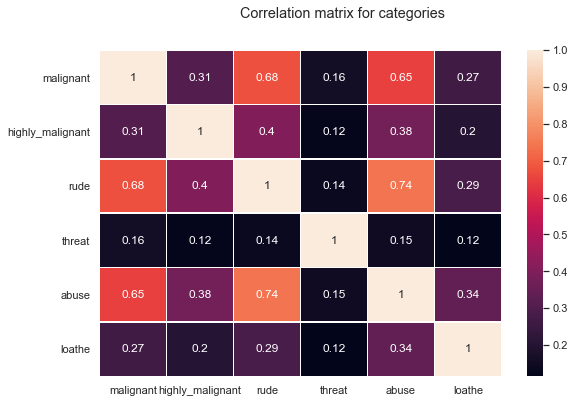

In [12]:
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Correlation matrix for categories')
sn.heatmap(train[listy].corr(), annot=True, linewidths=.5, ax=ax)

#### Correlation w.r.t each label

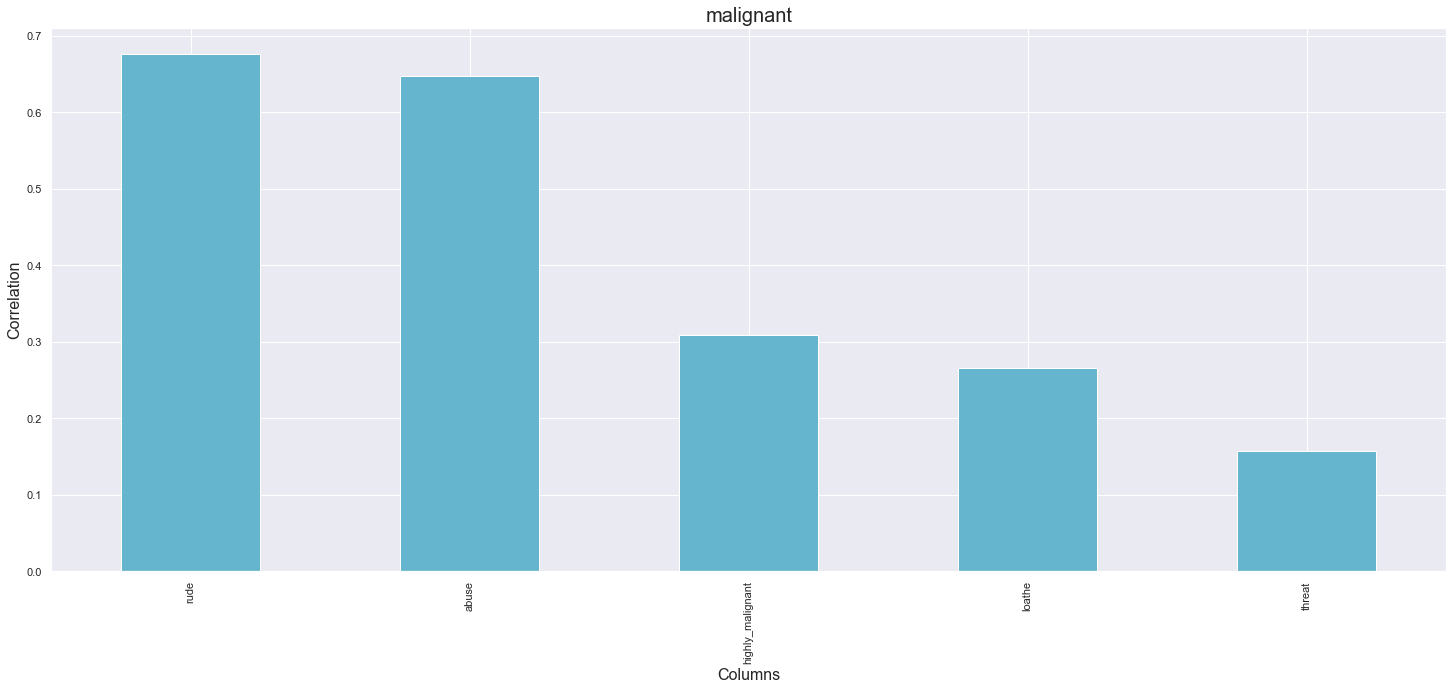

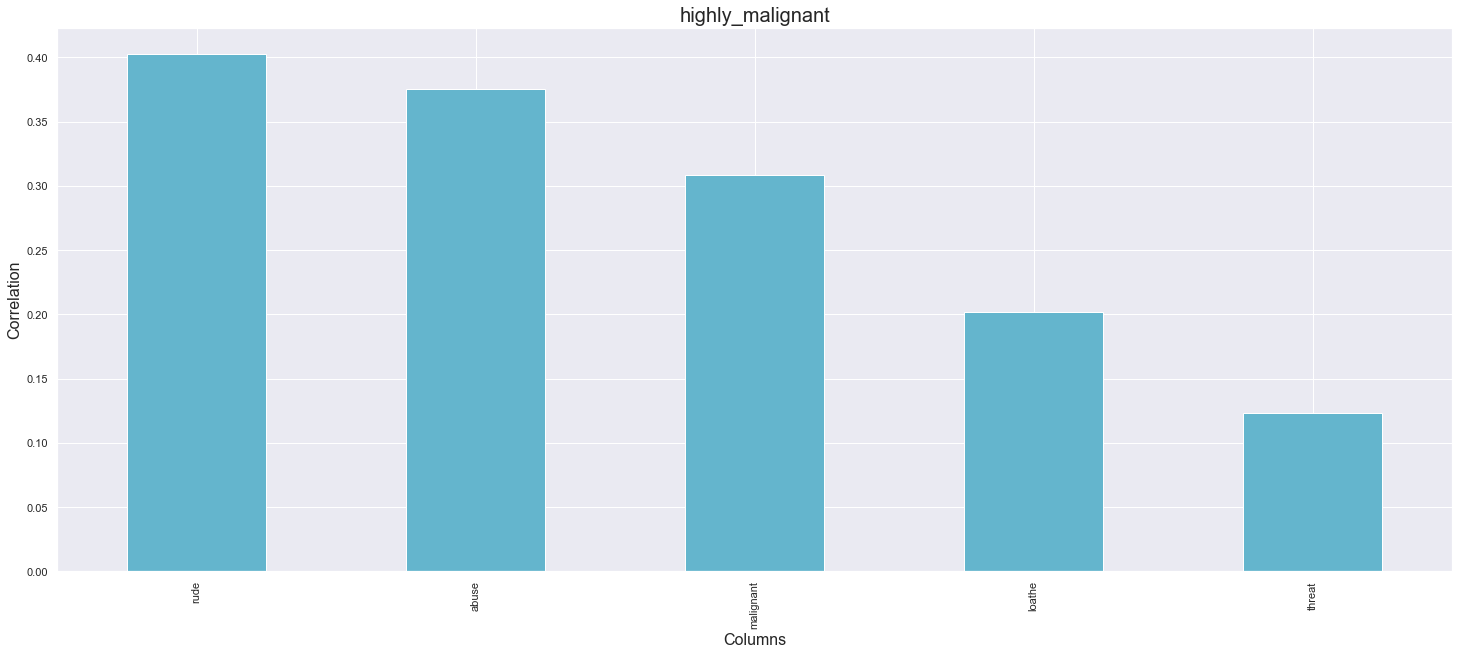

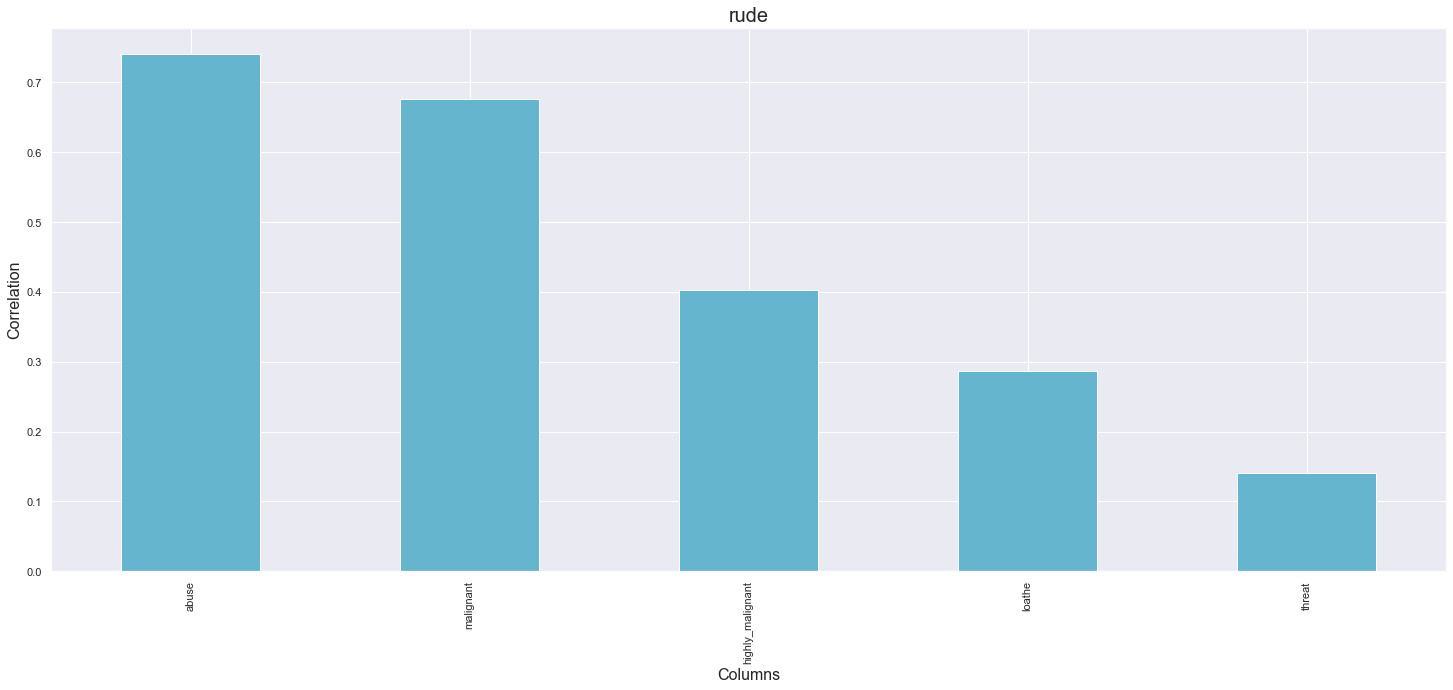

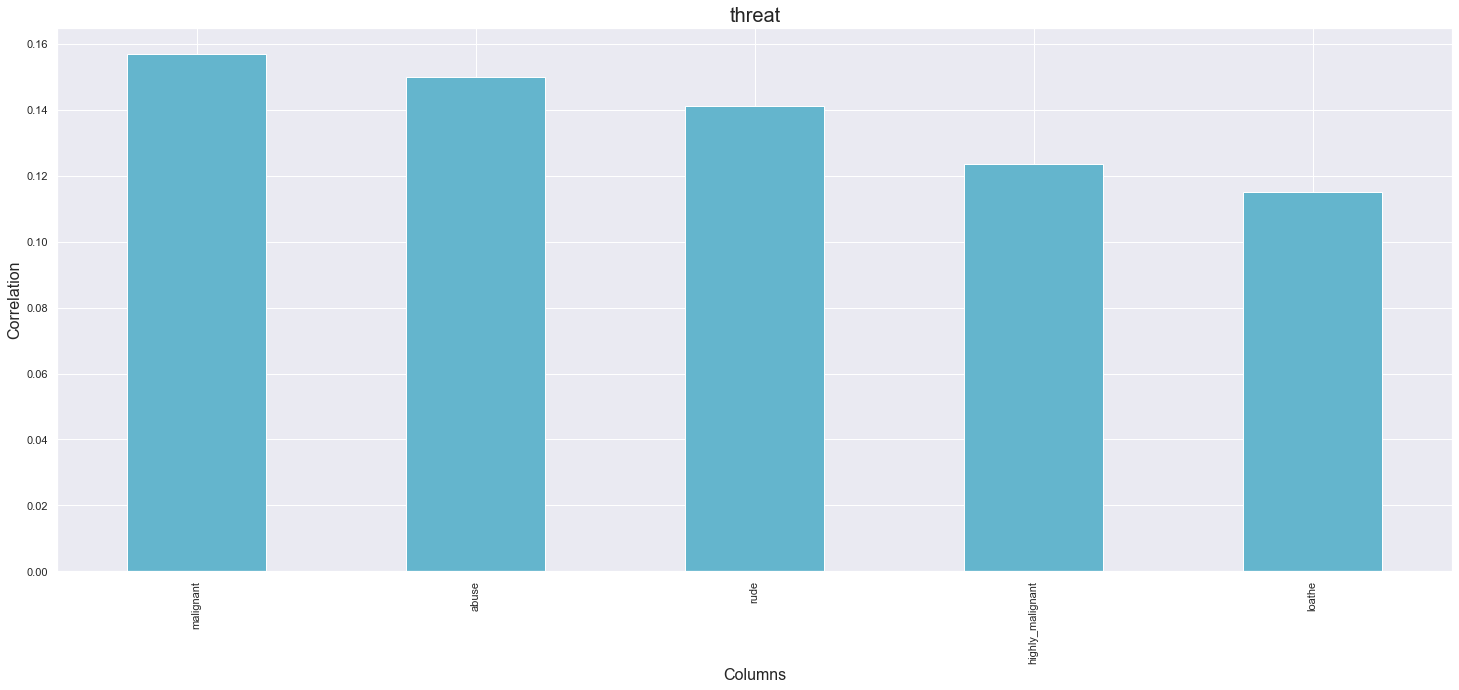

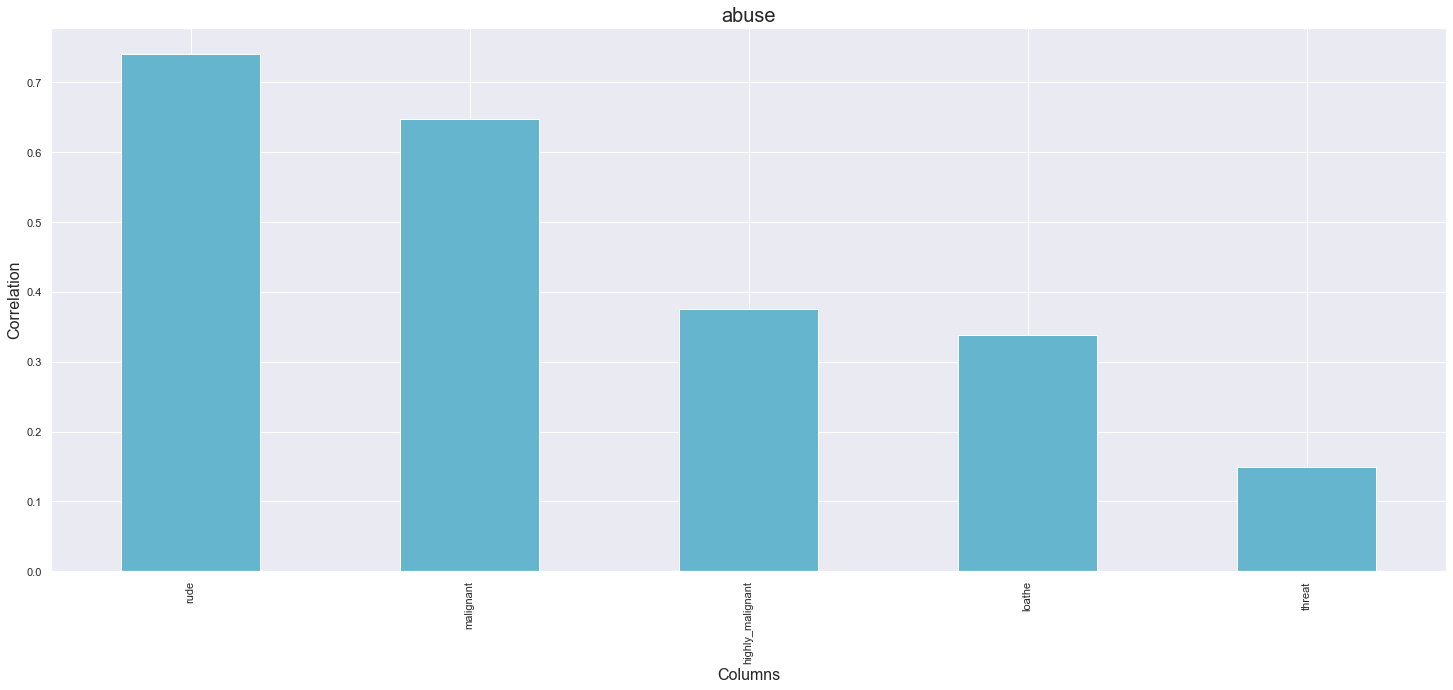

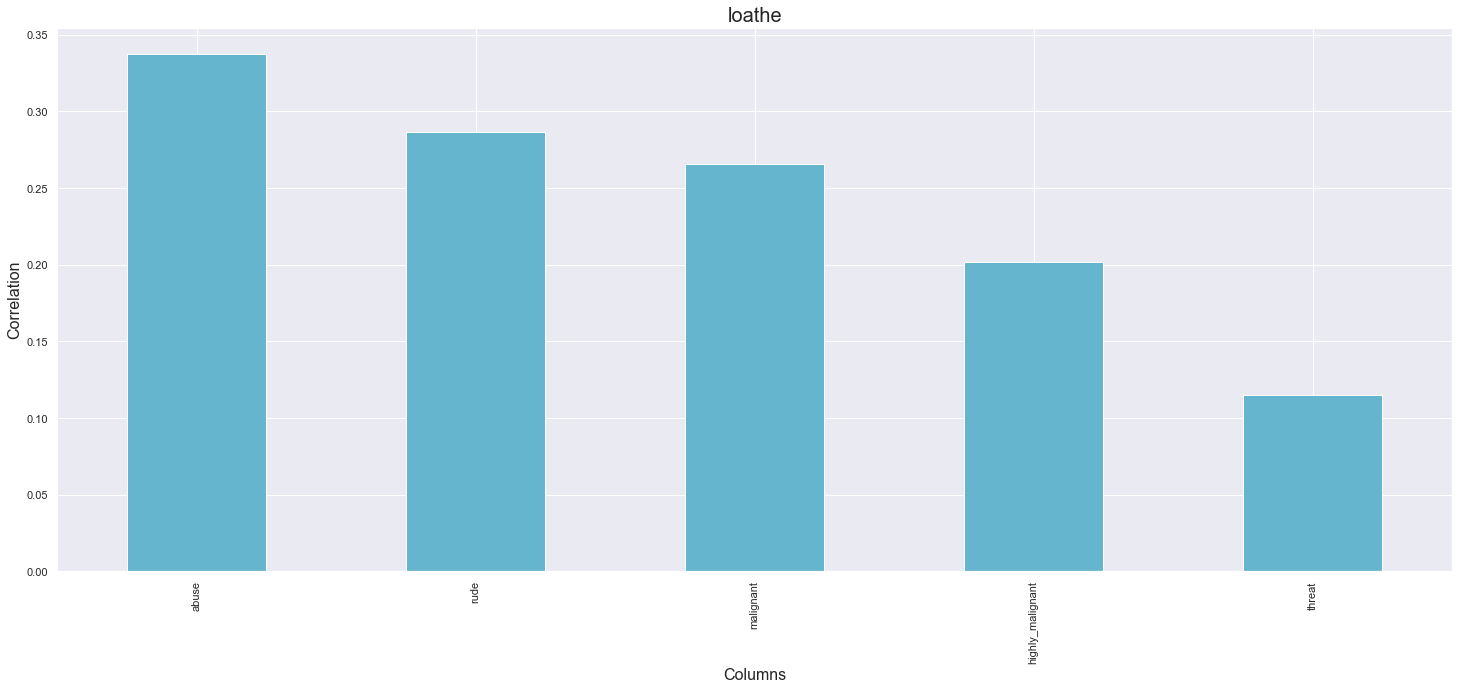

In [13]:
for i in listy:
    plt.figure(figsize = (25, 10))
    train.corr()[i].sort_values(ascending = False).drop([i]).plot(kind = 'bar', color = 'c')
    plt.xlabel('Columns', fontsize = 16)
    plt.ylabel('Correlation', fontsize = 16)
    plt.title(i, fontsize = 20)
    plt.show()

#### Sampling the data for fast computing

In [14]:
n=159571
s=15957
skip = sorted(random.sample(range(1, n), n-s))  # n+1 to compensate for header
sampledf=train.copy()
sampledf.drop(skip,axis=0,inplace=True)
sampledf

comment_text  malignant  \
0       closure edits explanation since remove talk fa...          0   
6                             cocksucker around piss work          1   
12      destroying anti one behavior question contribu...          1   
17        voydan pop georgiev redirect talk chernodrinski          0   
28          bit quite work picture duck example base take          0   
...                                                   ...        ...   
159511  point defaultsort defaultsorting title year be...          0   
159524  launched match fanaticism attack tortured japa...          0   
159525                               icon get like really          0   
159531  episode done collective labeling addendum netf...          0   
159545  utc bmattson also forum webaddress discussion ...          0   

        highly_malignant  rude  threat  abuse  loathe  
0                      0     0       0      0       0  
6                      1     1       0      1       0  
12                     0     0       0      0       0  
17                     0     0       0      0       0  
28                     0     0       0      0       0  
...                  ...   ...     ...    ...     ...  
159511                 0     0       0      0       0  
159524                 0     0       0      0       0  
159525                 0     0       0      0       0  
159531                 0     0       0      0       0  
159545                 0     0       0      0       0  

[15957 rows x 7 columns]

<AxesSubplot:title={'center':'Labels Frequency'}>

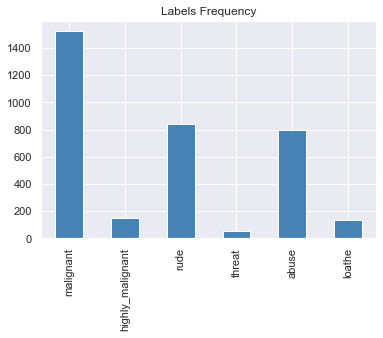

In [15]:
train_labels = sampledf[['malignant', 'highly_malignant', 'rude','threat', 'abuse', 'loathe']]
label_count = train_labels.sum()
label_count.plot(kind='bar', title='Labels Frequency', color='steelblue')

### Data transformation

##### Encoding strings to numbers

In [16]:
tf_vec = TfidfVectorizer(max_features = 1000, stop_words='english')
tf_vec.fit(train['comment_text'])
x= tf_vec.transform(train['comment_text'])
xs=tf_vec.transform(sampledf['comment_text'])
test_x=tf_vec.transform(test['comment_text'])
y=sampledf.drop(['comment_text'],axis=1)

#### Spilting data

In [17]:
iter_model=[]
model_scores=[]
model_ham=[]
x_train,x_test,y_train,y_test=train_test_split(xs,y,random_state = 42,test_size=0.20)

### Best random state

In [18]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(43,100,2):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20)
        model.fit(x_train,y_train)
        tmp=accuracy_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum accuracy_score is at random state :",random," and it is :",score)

### Model Building & Evaluation

In [19]:
models=[LogisticRegression(),LGBMClassifier(),MultinomialNB(),ExtraTreesClassifier(),RandomForestClassifier()]

In [20]:
for i in models:
    clf=BinaryRelevance(i)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    model_scores.append(accuracy_score(y_test,y_pred))
    model_ham.append(hamming_loss(y_test, y_pred))
    iter_model.append('BinaryRelevance '+str(i))
    print('BinaryRelevance '+str(i))
    print('Acc score',accuracy_score(y_test,y_pred))
    print('hamming loss',hamming_loss(y_test, y_pred))
    print('*'*10)
    
    clf=ClassifierChain(i)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    model_scores.append(accuracy_score(y_test,y_pred))
    model_ham.append(hamming_loss(y_test, y_pred))
    iter_model.append('ClassifierChain '+str(i))
    print('ClassifierChain '+str(i))
    print('Acc score',accuracy_score(y_test,y_pred))
    print('hamming loss',hamming_loss(y_test, y_pred))
    print('*'*10)
    
    clf=OneVsRestClassifier(i)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    model_scores.append(accuracy_score(y_test,y_pred))
    iter_model.append('OneVsRestClassifier '+str(i))
    model_ham.append(hamming_loss(y_test, y_pred))
    print('OneVsRestClassifier '+str(i))
    print('Acc score',accuracy_score(y_test,y_pred))
    print('hamming loss',hamming_loss(y_test, y_pred))
    print('*'*10)
    
    clf=RegressorChain(i)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    model_scores.append(accuracy_score(y_test,y_pred))
    model_ham.append(hamming_loss(y_test, y_pred))
    iter_model.append('RegressorChain '+str(i))
    print('RegressorChain '+str(i))
    print('Acc score',accuracy_score(y_test,y_pred))
    print('hamming loss',hamming_loss(y_test, y_pred))
    print('*'*10)

BinaryRelevance LogisticRegression()
Acc score 0.9176065162907269
hamming loss 0.022138680033416874
**********
ClassifierChain LogisticRegression()
Acc score 0.9232456140350878
hamming loss 0.020833333333333332
**********
OneVsRestClassifier LogisticRegression()
Acc score 0.9176065162907269
hamming loss 0.022138680033416874
**********
RegressorChain LogisticRegression()
Acc score 0.9232456140350878
hamming loss 0.020833333333333332
**********
BinaryRelevance LGBMClassifier()
Acc score 0.9160401002506265
hamming loss 0.0216687552213868
**********
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
ClassifierChain LGBMClassifier()
Acc score 0.9166666666666666
hamming loss 0.022138680033416874
**********
OneVsRestClassifier LGBMClassifier()
Acc score 0.9160401002506265
hamming loss 0.0216687552

In [21]:
d={'Model':iter_model,'Scores':model_scores,'Hamming loss':model_ham}
models=pd.DataFrame(data=d)
models

Model    Scores  Hamming loss
0           BinaryRelevance LogisticRegression()  0.917607      0.022139
1           ClassifierChain LogisticRegression()  0.923246      0.020833
2       OneVsRestClassifier LogisticRegression()  0.917607      0.022139
3            RegressorChain LogisticRegression()  0.923246      0.020833
4               BinaryRelevance LGBMClassifier()  0.916040      0.021669
5               ClassifierChain LGBMClassifier()  0.916667      0.022139
6           OneVsRestClassifier LGBMClassifier()  0.916040      0.021669
7                RegressorChain LGBMClassifier()  0.916667      0.022139
8                BinaryRelevance MultinomialNB()  0.914160      0.023392
9                ClassifierChain MultinomialNB()  0.912907      0.023705
10           OneVsRestClassifier MultinomialNB()  0.914160      0.023392
11                RegressorChain MultinomialNB()  0.912907      0.023705
12        BinaryRelevance ExtraTreesClassifier()  0.916667      0.021930
13        ClassifierChain ExtraTreesClassifier()  0.917293      0.022191
14    OneVsRestClassifier ExtraTreesClassifier()  0.915727      0.022034
15         RegressorChain ExtraTreesClassifier()  0.916667      0.022348
16      BinaryRelevance RandomForestClassifier()  0.915727      0.021460
17      ClassifierChain RandomForestClassifier()  0.918546      0.021721
18  OneVsRestClassifier RandomForestClassifier()  0.916040      0.021512
19       RegressorChain RandomForestClassifier()  0.918546      0.021721

In [45]:
models.sort_values(by=['Scores'],ascending=False)

Model    Scores  Hamming loss
1           ClassifierChain LogisticRegression()  0.923246      0.020833
3            RegressorChain LogisticRegression()  0.923246      0.020833
19       RegressorChain RandomForestClassifier()  0.918546      0.021721
17      ClassifierChain RandomForestClassifier()  0.918546      0.021721
0           BinaryRelevance LogisticRegression()  0.917607      0.022139
2       OneVsRestClassifier LogisticRegression()  0.917607      0.022139
13        ClassifierChain ExtraTreesClassifier()  0.917293      0.022191
5               ClassifierChain LGBMClassifier()  0.916667      0.022139
7                RegressorChain LGBMClassifier()  0.916667      0.022139
12        BinaryRelevance ExtraTreesClassifier()  0.916667      0.021930
15         RegressorChain ExtraTreesClassifier()  0.916667      0.022348
6           OneVsRestClassifier LGBMClassifier()  0.916040      0.021669
4               BinaryRelevance LGBMClassifier()  0.916040      0.021669
18  OneVsRestClassifier RandomForestClassifier()  0.916040      0.021512
14    OneVsRestClassifier ExtraTreesClassifier()  0.915727      0.022034
16      BinaryRelevance RandomForestClassifier()  0.915727      0.021460
8                BinaryRelevance MultinomialNB()  0.914160      0.023392
10           OneVsRestClassifier MultinomialNB()  0.914160      0.023392
9                ClassifierChain MultinomialNB()  0.912907      0.023705
11                RegressorChain MultinomialNB()  0.912907      0.023705

### Hyperparameter Tuning

In [26]:
y=train.drop(['comment_text'],axis=1)
parameters={'classifier': [LogisticRegression(n_jobs=-1)],
            'classifier__multi_class':['auto','ovr','multinomial'],
           'classifier__solver':['newton-cg', 'lbfgs','lbfgs','sag','saga'],'classifier__C':[100, 10, 1.0, 0.1, 0.01]}
clf = RandomizedSearchCV(ClassifierChain(), parameters, cv=5,scoring="accuracy",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_, clf.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'classifier__solver': 'saga',
  'classifier__multi_class': 'multinomial',
  'classifier__C': 1.0,
  'classifier': LogisticRegression(multi_class='multinomial', n_jobs=-1, solver='saga')},
 0.9135369329512985)

### Best Random State w.r.t Best performing Model

In [28]:
clf=RegressorChain(LogisticRegression(multi_class='multinomial',C=1.0,solver='saga',n_jobs=-1))
besttrain(clf,x,y)

maximum accuracy_score is at random state : 81  and it is : 0.9168102772990757


## RegressorChain-LogisticRegression

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 81 ,test_size=0.20)
model = RegressorChain(LogisticRegression(multi_class='multinomial',C=1.0,solver='saga',n_jobs=-1))
model.fit(x_train,y_train)
y_acc=model.predict(x_train)
print('Train accuracy',accuracy_score(y_train,y_acc))
y_pred=model.predict(x_test)
print('Test accuracy',accuracy_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
scores=cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
score=np.mean(scores)
print('cross_val_score:',score)
if accuracy_score(y_test,y_pred)>score:
    diff=accuracy_score(y_test,y_pred)-score
    print('accuracy bigger')
else:
    diff=score-accuracy_score(y_test,y_pred)
print('diff',diff)
std=np.std(scores)
print('std:',std)

Train accuracy 0.9149981199473586
Test accuracy 0.9168102772990757
classification report 
               precision    recall  f1-score   support

           0       0.87      0.50      0.64      2970
           1       0.54      0.15      0.23       312
           2       0.88      0.61      0.72      1665
           3       0.67      0.02      0.04        99
           4       0.73      0.54      0.62      1561
           5       0.65      0.12      0.20       303

   micro avg       0.82      0.50      0.62      6910
   macro avg       0.72      0.32      0.41      6910
weighted avg       0.81      0.50      0.61      6910
 samples avg       0.04      0.04      0.04      6910



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.8min remaining: 10.3min


cross_val_score: 0.912561866819811
accuracy bigger
diff 0.004248410479264719
std: 0.001343792127050532


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.0min finished


## RegressorChain-RandomForest Classifier

### Hyperparameter Tuning

In [78]:
parameters={'base_estimator__max_depth':[5,8,15,25,30],
            'base_estimator__criterion':['gini', 'entropy'],'base_estimator__max_features':['auto','sqrt','log2'],
           'base_estimator__n_estimators':[10,100,500]}
clf = RandomizedSearchCV(RegressorChain(RandomForestClassifier()), parameters, cv=5,scoring="accuracy",n_jobs=-1,verbose=1)
clf.fit(x_train,y_train)
print (clf.best_params_, clf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'base_estimator__n_estimators': 100, 'base_estimator__max_features': 'auto', 'base_estimator__max_depth': 30, 'base_estimator__criterion': 'gini'} 0.911966517061984


### Random state

In [79]:
clf=RegressorChain(RandomForestClassifier(max_features='auto',n_estimators=100,max_depth=30,criterion='gini'))
besttrain(clf,x,y)

maximum accuracy_score is at random state : 81  and it is : 0.9156196146012847


In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 81 ,test_size=0.20)
reg = RegressorChain(RandomForestClassifier(max_features='auto',n_estimators=100,max_depth=30,criterion='gini'))
reg.fit(x_train,y_train)
y_acc=reg.predict(x_train)
print('Train accuracy',accuracy_score(y_train,y_acc))
y_pred=reg.predict(x_test)
print('Test accuracy',accuracy_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
scores=cross_val_score(reg,x_train,y_train,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
score=np.mean(scores)
print('cross_val_score:',score)
if accuracy_score(y_test,y_pred)>score:
    diff=accuracy_score(y_test,y_pred)-score
    print('accuracy bigger')
else:
    diff=score-accuracy_score(y_test,y_pred)
print('diff',diff)
std=np.std(scores)
print('std:',std)

Train accuracy 0.9232390173591527
Test accuracy 0.9156509478301739
classification report 
               precision    recall  f1-score   support

           0       0.95      0.40      0.56      2970
           1       0.36      0.01      0.02       312
           2       0.94      0.56      0.70      1665
           3       0.00      0.00      0.00        99
           4       0.77      0.47      0.58      1561
           5       0.44      0.01      0.03       303

   micro avg       0.89      0.41      0.56      6910
   macro avg       0.58      0.24      0.32      6910
weighted avg       0.84      0.41      0.54      6910
 samples avg       0.03      0.03      0.03      6910



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.7min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.7min finished


cross_val_score: 0.9119195159913879
accuracy bigger
diff 0.0037314318387859924
std: 0.0012743445824057837


In [82]:
y_acc=reg.predict(x)
print('Overall accuracy',accuracy_score(y,y_acc))
print("classification report \n",classification_report(y_test,y_pred))
scores=cross_val_score(reg,x,y,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
score=np.mean(scores)
print('cross_val_score:',score)
std=np.std(scores)
print('std:',std)

Overall accuracy 0.9217213654110082
classification report 
               precision    recall  f1-score   support

           0       0.95      0.40      0.56      2970
           1       0.36      0.01      0.02       312
           2       0.94      0.56      0.70      1665
           3       0.00      0.00      0.00        99
           4       0.77      0.47      0.58      1561
           5       0.44      0.01      0.03       303

   micro avg       0.89      0.41      0.56      6910
   macro avg       0.58      0.24      0.32      6910
weighted avg       0.84      0.41      0.54      6910
 samples avg       0.03      0.03      0.03      6910



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.9min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.0min finished


cross_val_score: 0.9124277130853716
std: 0.001404653710391272


In [90]:
train[['pred_malignant','pred_highly_malignant','pred_rude','pred_threat','pred_abuse','pred_loathe']]=y_acc

In [91]:
train

comment_text  malignant  \
0       closure edits explanation since remove talk fa...          0   
1       utc aww seemingly match stuck colour thanks ba...          0   
2       guy edits relevant actual trying hey talking i...          0   
3       preference exact need real reviewer section fo...          0   
4                           remember page hero chance sir          0   
...                                                   ...        ...   
159566  source aspect one asking opening anyone contra...          0   
159567               page thing talk ashamed horrible put          0   
159568  prostitution article crunch spitzer umm ring a...          0   
159569  version deleted put look first like speedy act...          0   
159570  helping kind rewrite think understand really i...          0   

        highly_malignant  rude  threat  abuse  loathe  pred_malignant  \
0                      0     0       0      0       0             0.0   
1                      0     0       0      0       0             0.0   
2                      0     0       0      0       0             0.0   
3                      0     0       0      0       0             0.0   
4                      0     0       0      0       0             0.0   
...                  ...   ...     ...    ...     ...             ...   
159566                 0     0       0      0       0             0.0   
159567                 0     0       0      0       0             0.0   
159568                 0     0       0      0       0             0.0   
159569                 0     0       0      0       0             0.0   
159570                 0     0       0      0       0             0.0   

        pred_highly_malignant  pred_rude  pred_threat  pred_abuse  pred_loathe  
0                         0.0        0.0          0.0         0.0          0.0  
1                         0.0        0.0          0.0         0.0          0.0  
2                         0.0        0.0          0.0         0.0          0.0  
3                         0.0        0.0          0.0         0.0          0.0  
4                         0.0        0.0          0.0         0.0          0.0  
...                       ...        ...          ...         ...          ...  
159566                    0.0        0.0          0.0         0.0          0.0  
159567                    0.0        0.0          0.0         0.0          0.0  
159568                    0.0        0.0          0.0         0.0          0.0  
159569                    0.0        0.0          0.0         0.0          0.0  
159570                    0.0        0.0          0.0         0.0          0.0  

[159571 rows x 13 columns]

In [92]:
count_maliganant=0
count_highly_malignant=0
count_threat=0
count_rude=0
count_abuse=0
count_loathe=0

In [94]:
for i in range(len(train['malignant'])):
    if train['malignant'].iloc[i]!=train['pred_malignant'].iloc[i]:
        count_maliganant+=1
    if train['highly_malignant'].iloc[i]!=train['pred_highly_malignant'].iloc[i]:
        count_highly_malignant+=1
    if train['rude'].iloc[i]!=train['pred_rude'].iloc[i]:
        count_rude+=1
    if train['threat'].iloc[i]!=train['pred_threat'].iloc[i]:
        count_threat+=1
    if train['abuse'].iloc[i]!=train['pred_abuse'].iloc[i]:
        count_abuse+=1
    if train['loathe'].iloc[i]!=train['pred_loathe'].iloc[i]:
        count_loathe+=1

In [98]:
print('Wrongly predicted maliganant count:',count_maliganant)
print('Wrongly predicted highly maliganant count:',count_highly_malignant)
print('Wrongly predicted threat:',count_threat)
print('Wrongly predicted rude:',count_rude)
print('Wrongly predicted abuse:',count_abuse)
print('Wrongly predicted loathe:',count_loathe)

Wrongly predicted maliganant count: 8813
Wrongly predicted maliganant count: 1432
Wrongly predicted threat: 465
Wrongly predicted rude: 3538
Wrongly predicted abuse: 4714
Wrongly predicted loathe: 1280


In [99]:
print('Wrongly predicted maliganant percentage:',(count_maliganant/len(train.malignant))*100)
print('Wrongly predicted highly maliganant percentage:',(count_highly_malignant/len(train.malignant))*100)
print('Wrongly predicted threat percentage:',(count_threat/len(train.malignant))*100)
print('Wrongly predicted rude percentage:',(count_rude/len(train.malignant))*100)
print('Wrongly predicted abuse percentge:',(count_abuse/len(train.malignant))*100)
print('Wrongly predicted loathe percentage:',(count_loathe/len(train.malignant))*100)

Wrongly predicted maliganant percentage: 5.522933365085135
Wrongly predicted highly maliganant percentage: 0.8974061702941011
Wrongly predicted threat percentage: 0.29140633323097553
Wrongly predicted rude percentage: 2.217194853701487
Wrongly predicted abuse percentge: 2.954170870646922
Wrongly predicted loathe percentage: 0.8021507667433305


In [100]:
print('Correctly predicted maliganant percentage:',((len(train.malignant)-count_maliganant)/len(train.malignant))*100)
print('Correctly predicted highly maliganant percentage:',((len(train.malignant)-count_highly_malignant)/len(train.malignant))*100)
print('Correctly predicted threat percentage:',((len(train.malignant)-count_threat)/len(train.malignant))*100)
print('Correctly predicted rude percentage:',((len(train.malignant)-count_rude)/len(train.malignant))*100)
print('Correctly predicted abuse percentge:',((len(train.malignant)-count_abuse)/len(train.malignant))*100)
print('Correctly predicted loathe percentage:',((len(train.malignant)-count_loathe)/len(train.malignant))*100)

Correctly predicted maliganant percentage: 94.47706663491486
Correctly predicted highly maliganant percentage: 99.1025938297059
Correctly predicted threat percentage: 99.70859366676903
Correctly predicted rude percentage: 97.78280514629851
Correctly predicted abuse percentge: 97.04582912935308
Correctly predicted loathe percentage: 99.19784923325668


### Data visualization

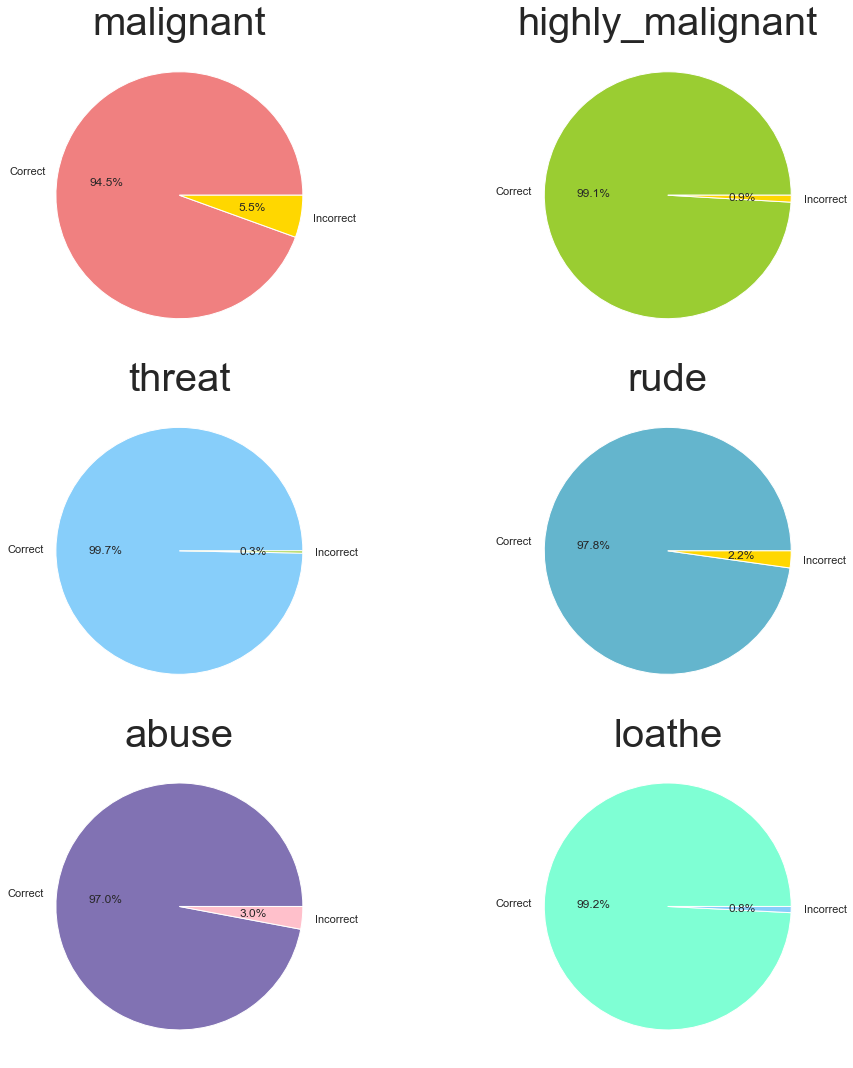

In [135]:
plt.figure(figsize=(15,15),facecolor='white')
plt.subplot(3, 2, 1)
colors = ['lightcoral','gold']
plt.pie([(len(train.malignant)-count_maliganant),count_maliganant], labels =['Correct','Incorrect'],
        autopct='%1.1f%%',colors=colors)
plt.title('malignant',fontsize = 40)

plt.subplot(3, 2, 2)
colors = ['yellowgreen','gold']
plt.pie([(len(train.malignant)-count_highly_malignant),count_highly_malignant], labels =['Correct','Incorrect'],
        autopct='%1.1f%%',colors=colors)
plt.title('highly_malignant',fontsize = 40)

plt.subplot(3, 2, 3)
colors = ['lightskyblue','yellowgreen']
plt.pie([(len(train.malignant)-count_threat),count_threat], labels =['Correct','Incorrect'],
        autopct='%1.1f%%',colors=colors)
plt.title('threat',fontsize = 40)

plt.subplot(3, 2, 4)
colors = ['c','gold']
plt.pie([(len(train.malignant)-count_rude),count_rude], labels =['Correct','Incorrect'],
        autopct='%1.1f%%',colors=colors)
plt.title('rude',fontsize = 40)

plt.subplot(3, 2, 5)
colors = ['m','pink']
plt.pie([(len(train.malignant)-count_abuse),count_abuse], labels =['Correct','Incorrect'],
        autopct='%1.1f%%',colors=colors)
plt.title('abuse',fontsize = 40)

plt.subplot(3, 2, 6)
colors = ['aquamarine','lightskyblue']
plt.pie([(len(train.malignant)-count_loathe),count_loathe], labels =['Correct','Incorrect'],
        autopct='%1.1f%%',colors=colors)
plt.title('loathe',fontsize = 40)

plt.tight_layout()

In [147]:
y_acc=reg.predict(test_x)

In [150]:
test[['malignant','highly_malignant','rude','threat','abuse','loathe']]=y_acc
test

comment_text  malignant  \
0       face guy thing bein kiss fuckin sicken music t...        1.0   
1                                      imo title fine rfc        0.0   
2                              source zawe lapland ashton        0.0   
3       source shall thank form update look informatio...        0.0   
4                                article anonymously edit        0.0   
...                                                   ...        ...   
153159              long totally nothing stuff crap agree        0.0   
153160  arm field mickey rich faster throw fielder doe...        0.0   
153161  economic okinotorishima exclusive japan acknow...        0.0   
153162  citizen palestine one modern descendant state ...        0.0   
153163  kind well explination pity think bullshit enou...        0.0   

        highly_malignant  rude  threat  abuse  loathe  
0                    0.0   1.0     0.0    1.0     0.0  
1                    0.0   0.0     0.0    0.0     0.0  
2                    0.0   0.0     0.0    0.0     0.0  
3                    0.0   0.0     0.0    0.0     0.0  
4                    0.0   0.0     0.0    0.0     0.0  
...                  ...   ...     ...    ...     ...  
153159               0.0   0.0     0.0    0.0     0.0  
153160               0.0   0.0     0.0    0.0     0.0  
153161               0.0   0.0     0.0    0.0     0.0  
153162               0.0   0.0     0.0    0.0     0.0  
153163               0.0   0.0     0.0    0.0     0.0  

[153164 rows x 7 columns]

### Visualizing the most frequent words using WordMap(Predicted)

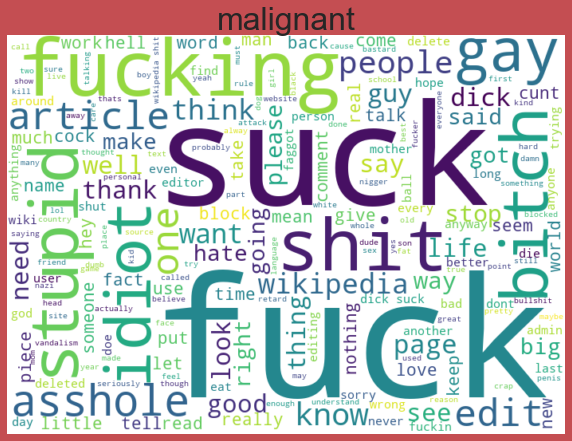

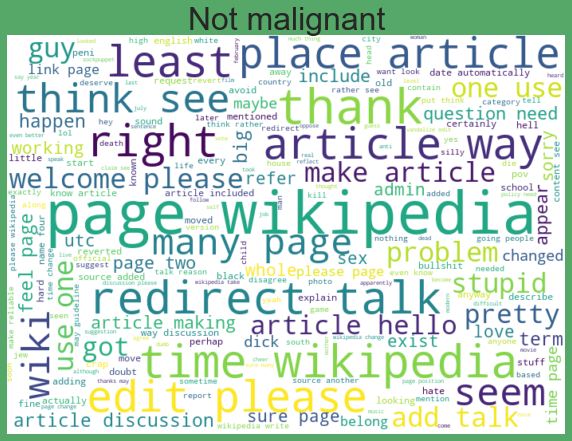

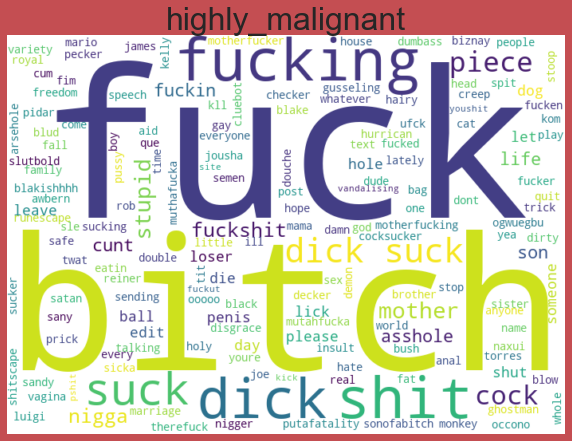

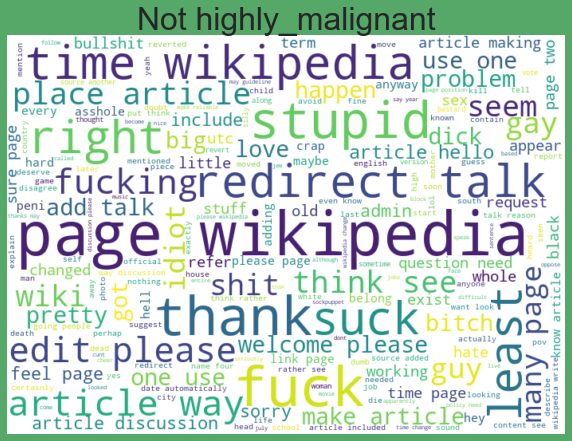

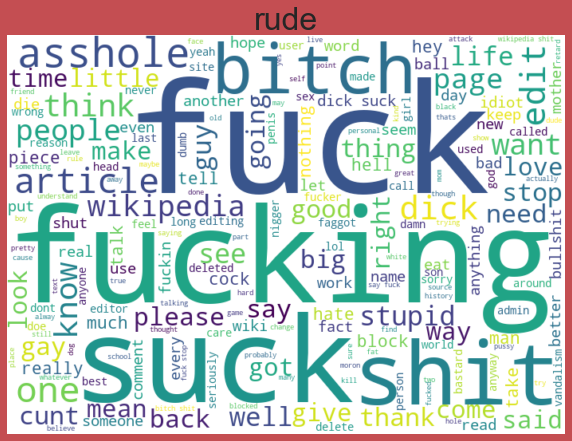

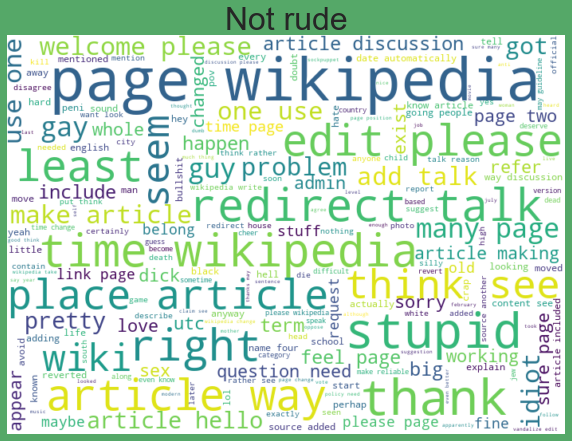

<Figure size 720x576 with 0 Axes>

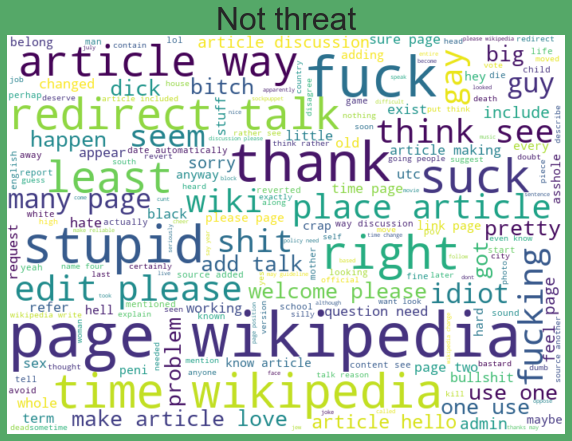

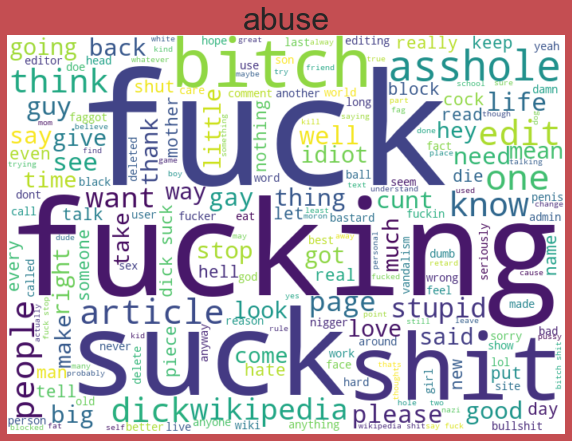

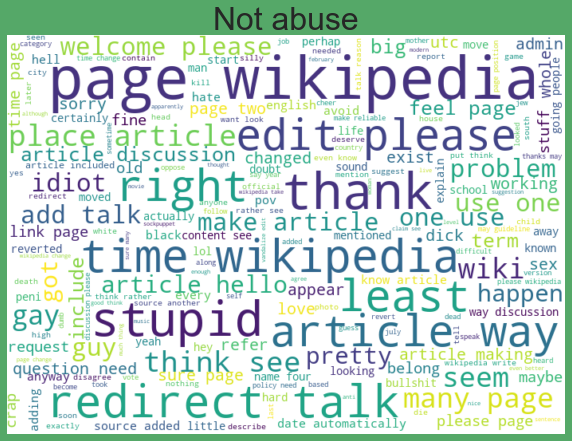

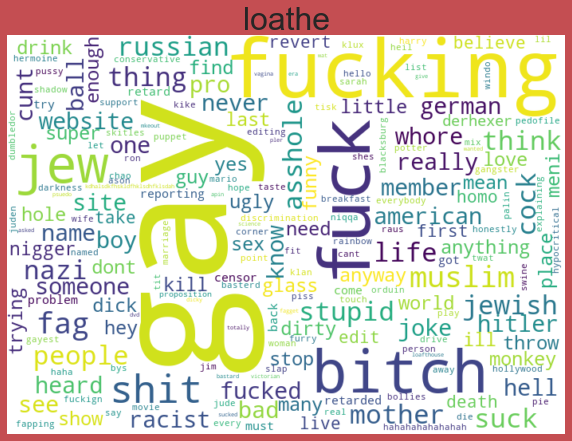

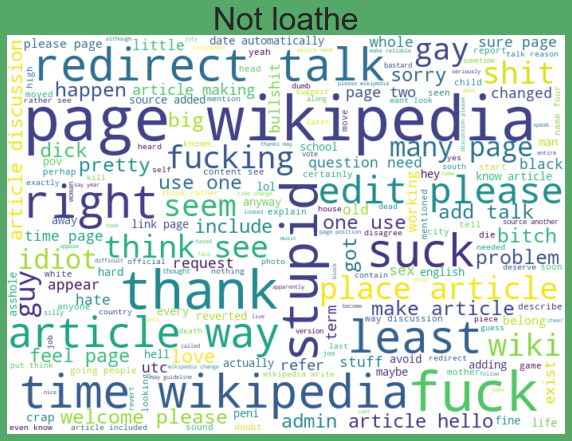

In [152]:
listy=list(test.columns)
listy.remove('comment_text')
for i in listy:
    try:
        plt.figure(figsize = (10,8),facecolor='r')
        dat=test['comment_text'][test[i]==1]
        wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat))
        plt.imshow(wordC, interpolation='bilinear')
        plt.title(i, fontsize = 32)
        plt.axis("off")
        plt.show()
    except:
        pass
        
    try:
        dat=test['comment_text'][test[i]==0]
        wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat))
        plt.figure(figsize = (10,8),facecolor='g')
        plt.imshow(wordC, interpolation='bilinear')
        plt.axis("off")
        plt.title('Not '+i, fontsize = 32)
        plt.show()
    except:
        pass

#### Exporting into .csv file

In [153]:
test.to_csv('pred_test.csv',index=False)